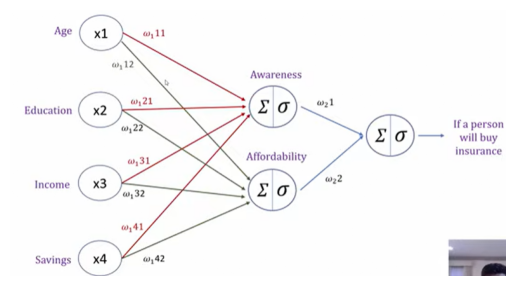

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(r"C:\Users\LENOVO\Pictures\Screenshots\Screenshot 2025-10-24 205824.png")
plt.imshow(img)
plt.axis('off')  # hides axes
plt.show()


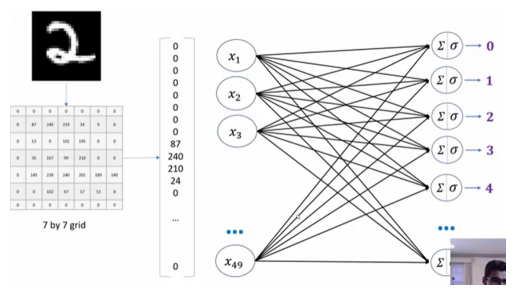

In [4]:

img = mpimg.imread(r"C:\Users\LENOVO\Pictures\Screenshots\Screenshot 2025-10-24 2113214.png")
plt.imshow(img)
plt.axis('off')  # hides axes
plt.show()

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 18s 2us/step


In [4]:
len(x_train),len(x_test)

(60000, 10000)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

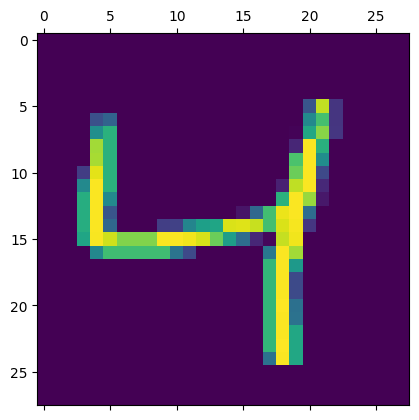

In [6]:
plt.matshow(x_train[2])

In [14]:

x_train=x_train/255
x_test=x_test/255

In [15]:
#flatten image
x_train_flat=x_train.reshape(len(x_train),28*28)

In [16]:
x_test_flat=x_test.reshape(len(x_test),28*28)

In [17]:
#sequetial means set of layers
#where dense means each neuron of each layer are connected
#10 means output layer m neuron and 784 hidden layer m neuron
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 856us/step - accuracy: 0.8774 - loss: 0.4674
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 892us/step - accuracy: 0.9141 - loss: 0.3038
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 812us/step - accuracy: 0.9205 - loss: 0.2832
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - accuracy: 0.9231 - loss: 0.2735
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 826us/step - accuracy: 0.9258 - loss: 0.2666


In [18]:
model.evaluate(x_train_flat,y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step - accuracy: 0.9266 - loss: 0.2612


[0.2611616849899292, 0.9265999794006348]

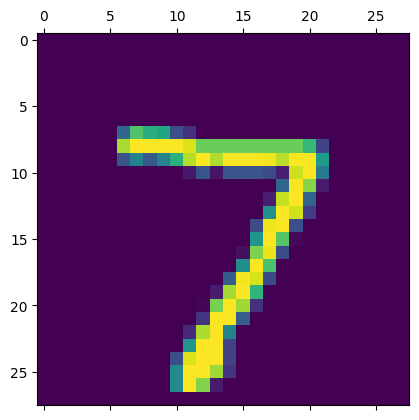

In [19]:
plt.matshow(x_test[0])

In [20]:
y_predicted=model.predict(x_test_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step


In [21]:
y_predicted[0]

array([2.0503020e-02, 4.1024046e-07, 8.5882194e-02, 9.6251643e-01,
       2.7386891e-03, 8.0312423e-02, 1.8423694e-06, 9.9980760e-01,
       6.4622745e-02, 7.0559788e-01], dtype=float32)

In [22]:
np.argmax(y_predicted[0])

np.int64(7)

In [27]:
y_predicted_labels = np.argmax(y_predicted, axis=1)

# Now both y_test and y_predicted_labels have shape [10000]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   4,    9,  951,   14,    8,    2,   12,   10,   17,    5],
       [   2,    0,   25,  929,    0,   14,    2,   13,   15,   10],
       [   1,    2,    6,    1,  919,    0,    8,    4,    5,   36],
       [  10,    3,    7,   48,   12,  751,   16,    9,   29,    7],
       [   9,    3,    8,    1,    7,    8,  920,    2,    0,    0],
       [   1,    6,   28,    3,    9,    0,    0,  949,    0,   32],
       [  10,    8,   12,   33,   10,   26,    9,   13,  838,   15],
       [  10,    7,    2,   14,   25,    4,    0,   25,    2,  920]],
      dtype=int32)>

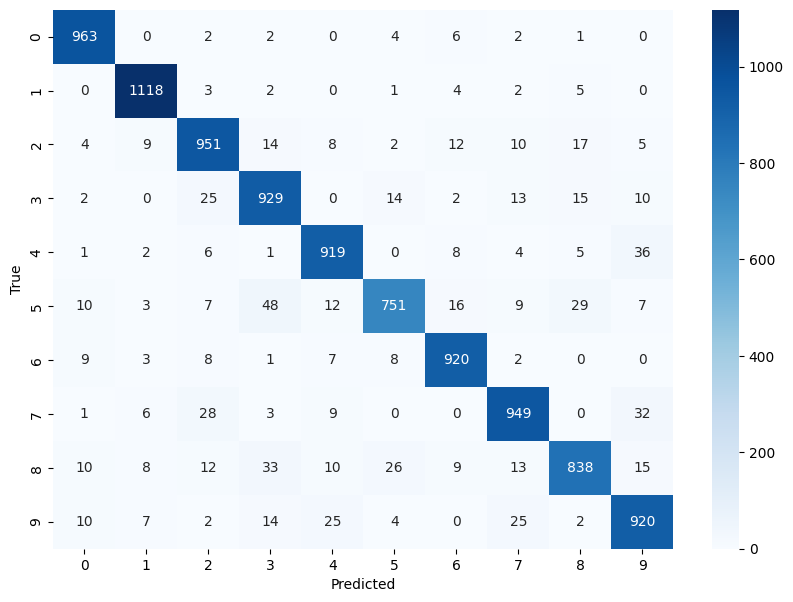

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [29]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flat,y_train,epochs=5)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1849 - loss: 4.3366
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1877 - loss: 4.2149
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1963 - loss: 4.1674
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.2132 - loss: 4.1132
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.2125 - loss: 4.1070


In [31]:
model.evaluate(x_test_flat,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.2179 - loss: 4.0660


[4.066035270690918, 0.21789999306201935]

ACTIVATION FUNCTIONS

In [1]:
import math
def sigmoid(x):
    return 1/(1+ math.exp(-x))

In [2]:
sigmoid(100)

1.0

In [4]:
def tanh(x):
    return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

In [5]:
tanh(-56)

-1.0

In [6]:
def relu(x):
    return max(0,x)

In [7]:
relu(-7)

0

In [8]:
relu(1)

1

In [9]:
def leaky_relu(x):
    return max(0.1*x,x)

In [10]:
leaky_relu(5)

5

In [11]:
leaky_relu(-100)

-10.0